## project

- Task: to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). 
- The dataset: The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

- source: https://www.kaggle.com/competitions/forest-cover-type-prediction/data

## target

- What kind of tree will gow in Roosevelt National Forest, Colorado.
- The seven types of cover type (trees) are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

## features

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

- The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

- The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [1]:
# common imports
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(4)

# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# I. EDA

## - first approach

In [2]:
test = pd.read_csv('data/test.csv')
test.shape

(565892, 55)

In [2]:
train = pd.read_csv('data/train.csv')
train.shape

(15120, 56)

In [4]:
train.iloc[:, :20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [23]:
train.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Soil_Type6   15120 non-null  int64
 1   Soil_Type7   15120 non-null  int64
 2   Soil_Type8   15120 non-null  int64
 3   Soil_Type9   15120 non-null  int64
 4   Soil_Type10  15120 non-null  int64
 5   Soil_Type11  15120 non-null  int64
 6   Soil_Type12  15120 non-null  int64
 7   Soil_Type13  15120 non-null  int64
 8   Soil_Type14  15120 non-null  int64
 9   Soil_Type15  15120 non-null  int64
 10  Soil_Type16  15120 non-null  int64
 11  Soil_Type17  15120 non-null  int64
 12  Soil_Type18  15120 non-null  int64
 13  Soil_Type19  15120 non-null  int64
 14  Soil_Type20  15120 non-null  int64
 15  Soil_Type21  15120 non-null  int64
 16  Soil_Type22  15120 non-null  int64
 17  Soil_Type23  15120 non-null  int64
 18  Soil_Type24  15120 non-null  int64
 19  Soil_Type25  15120 non-null  int64
dtypes: int

In [25]:
train.iloc[:, 40:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Soil_Type26  15120 non-null  int64
 1   Soil_Type27  15120 non-null  int64
 2   Soil_Type28  15120 non-null  int64
 3   Soil_Type29  15120 non-null  int64
 4   Soil_Type30  15120 non-null  int64
 5   Soil_Type31  15120 non-null  int64
 6   Soil_Type32  15120 non-null  int64
 7   Soil_Type33  15120 non-null  int64
 8   Soil_Type34  15120 non-null  int64
 9   Soil_Type35  15120 non-null  int64
 10  Soil_Type36  15120 non-null  int64
 11  Soil_Type37  15120 non-null  int64
 12  Soil_Type38  15120 non-null  int64
 13  Soil_Type39  15120 non-null  int64
 14  Soil_Type40  15120 non-null  int64
 15  Cover_Type   15120 non-null  int64
dtypes: int64(16)
memory usage: 1.8 MB


- all values are integers

In [30]:
train.iloc[:, :20].head().append(train.iloc[:, :20].tail())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0
15115,15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0
15116,15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0
15117,15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0
15118,15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0
15119,15120,2475,197,34,319,78,270,189,244,164,914,0,0,1,0,0,1,0,0,0


In [33]:
train.iloc[:, 20:40].head().append(train.iloc[:, 20:40].tail())

,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
train.iloc[:, 40:].head().append(train.iloc[:, 40:].tail())

,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
15115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [23]:
train.iloc[:, :20].describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
train.iloc[:, 20:40].describe()

,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25
count,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066
std,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
train.iloc[:, 40:].describe()

,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## - nulls, duplicates and outliers

In [36]:
# checking for nulls

train.iloc[:, :20].isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
dtype: int64

In [37]:
train.iloc[:, 20:40].isnull().sum()

Soil_Type6     0
Soil_Type7     0
Soil_Type8     0
Soil_Type9     0
Soil_Type10    0
Soil_Type11    0
Soil_Type12    0
Soil_Type13    0
Soil_Type14    0
Soil_Type15    0
Soil_Type16    0
Soil_Type17    0
Soil_Type18    0
Soil_Type19    0
Soil_Type20    0
Soil_Type21    0
Soil_Type22    0
Soil_Type23    0
Soil_Type24    0
Soil_Type25    0
dtype: int64

In [38]:
train.iloc[:, 40:].isnull().sum()

Soil_Type26    0
Soil_Type27    0
Soil_Type28    0
Soil_Type29    0
Soil_Type30    0
Soil_Type31    0
Soil_Type32    0
Soil_Type33    0
Soil_Type34    0
Soil_Type35    0
Soil_Type36    0
Soil_Type37    0
Soil_Type38    0
Soil_Type39    0
Soil_Type40    0
Cover_Type     0
dtype: int64

In [39]:
# re-check:
train.isnull().sum().sum()

0

In [26]:
# also the test train, just in case:
test.isnull().sum().sum()

0

- 0 nulls

In [42]:
train[train.duplicated() == True]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [27]:
test[test.duplicated() == True]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40


- 0 duplicates

- Find if there's columns only with 0s:

In [20]:
train.select_dtypes(include=['float64', 'int64']).sum().sort_values().head()

Soil_Type7     0
Soil_Type15    0
Soil_Type25    1
Soil_Type8     1
Soil_Type28    9
dtype: int64

In [28]:
test.select_dtypes(include=['float64', 'int64']).sum().sort_values().head()

Soil_Type15      3
Soil_Type7     105
Soil_Type36    109
Soil_Type8     178
Soil_Type37    264
dtype: int64

- Check for negative values:

In [19]:
(train < 0).sum().sort_values(ascending=False).head(3)

Vertical_Distance_To_Hydrology    1139
Id                                   0
Soil_Type28                          0
dtype: int64

In [3]:

cont_columns = [ 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [9]:
# outliers in non binary features

def number_of_outliers(df):
    
    df = df[[ 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [10]:
number_of_outliers(train).sort_values().tail(20)

Elevation                               0
Aspect                                  0
Slope                                  57
Hillshade_3pm                         124
Hillshade_Noon                        393
Hillshade_9am                         408
Horizontal_Distance_To_Hydrology      512
Vertical_Distance_To_Hydrology        586
Horizontal_Distance_To_Fire_Points    645
Horizontal_Distance_To_Roadways       830
dtype: int64

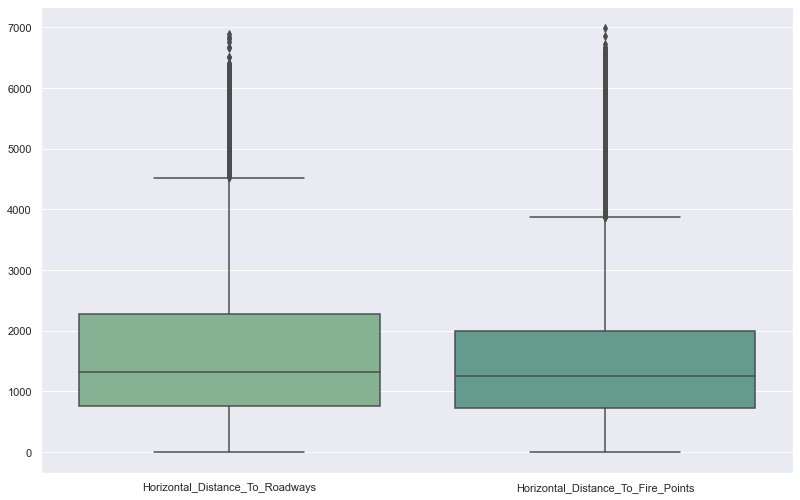

In [13]:
# plot for the features with highest outliers
sns.set_theme(rc = {'figure.figsize':(12,8)}, palette='crest')
sns.boxplot(data=train[['Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']]);

## - the target:


1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

In [29]:
train.replace({'Cover_Type': {1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 4: 'Cottonwood/Willow', 
                                5: 'Aspen', 6: 'Douglas-fir', 7: 'Krummholz'}}, inplace=True)

In [30]:
# the target is perfectly balanced
train['Cover_Type'].value_counts()

Aspen                2160
Lodgepole Pine       2160
Spruce/Fir           2160
Krummholz            2160
Ponderosa Pine       2160
Douglas-fir          2160
Cottonwood/Willow    2160
Name: Cover_Type, dtype: int64

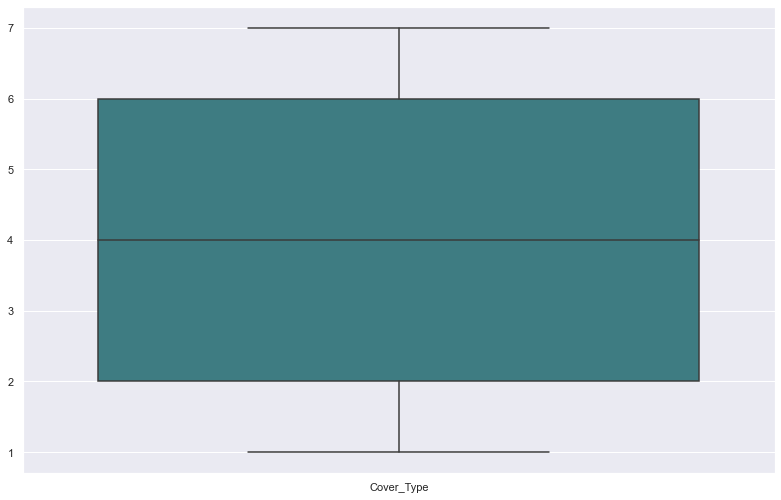

In [4]:
sns.set_theme(rc = {'figure.figsize':(12,8)}, palette='crest')
sns.boxplot(data=train[['Cover_Type']], palette='crest');

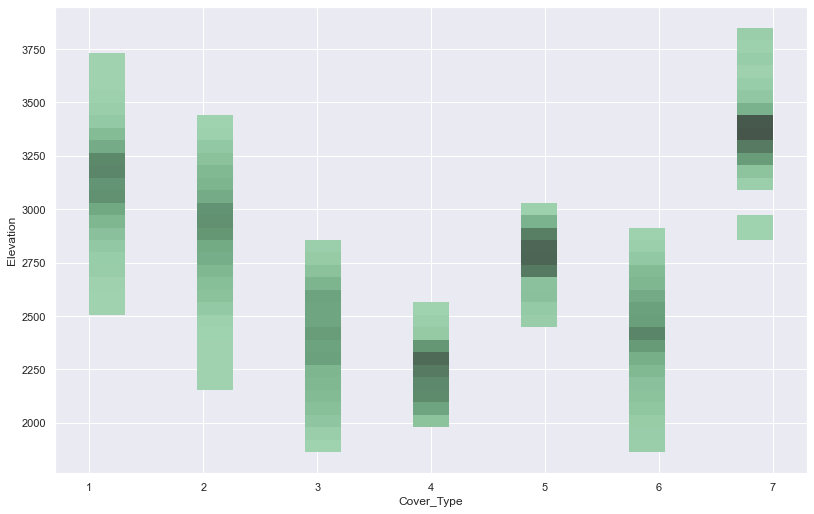

In [3]:
sns.set_theme(rc = {'figure.figsize':(12,8)}, palette='crest')

sns.histplot(x=train['Cover_Type'], y=train['Elevation']);

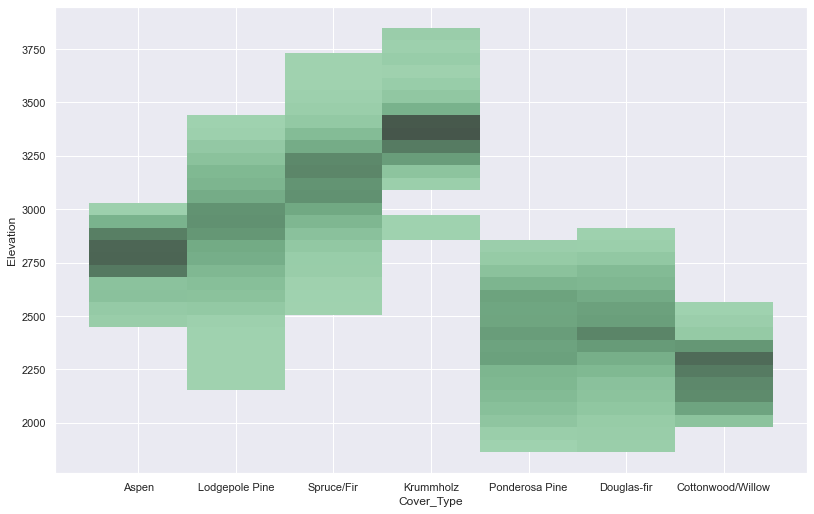

In [33]:
sns.histplot(x=train['Cover_Type'], y=train['Elevation']);

In [ ]:
sns.histplot(x=train['Cover_Type'], y=train['Elevation']);

- soil types 

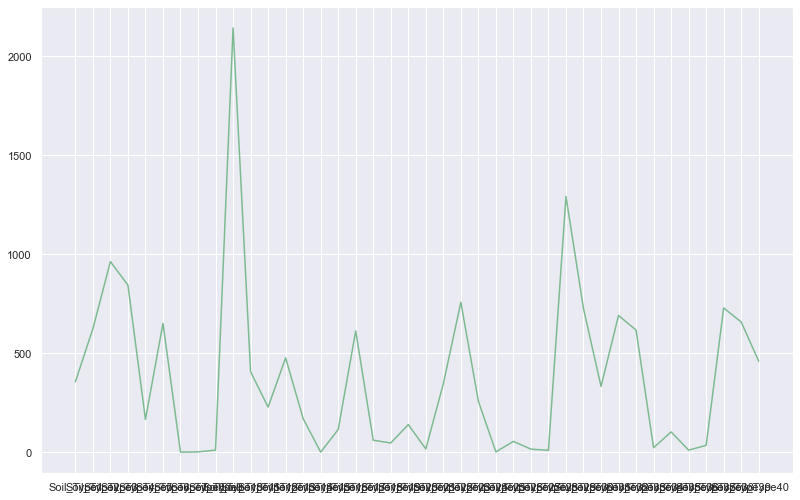

In [21]:
soil = train.iloc[:, 15:-1].sum()
sns.set_theme(rc = {'figure.figsize':(12,8)}, palette='crest')
sns.lineplot(data=soil);

In [6]:
soil.sort_values()

Soil_Type15       0
Soil_Type7        0
Soil_Type8        1
Soil_Type25       1
Soil_Type28       9
Soil_Type36      10
Soil_Type9       10
Soil_Type27      15
Soil_Type21      16
Soil_Type34      22
Soil_Type37      34
Soil_Type19      46
Soil_Type26      54
Soil_Type18      60
Soil_Type35     102
Soil_Type16     114
Soil_Type20     139
Soil_Type5      165
Soil_Type14     169
Soil_Type12     227
Soil_Type24     257
Soil_Type31     332
Soil_Type22     345
Soil_Type1      355
Soil_Type11     406
Soil_Type40     459
Soil_Type13     476
Soil_Type17     612
Soil_Type33     616
Soil_Type2      623
Soil_Type6      650
Soil_Type39     657
Soil_Type32     690
Soil_Type30     725
Soil_Type38     728
Soil_Type23     757
Soil_Type4      843
Soil_Type3      962
Soil_Type29    1291
Soil_Type10    2142
dtype: int64

- wilderness types

In [52]:
train.iloc[:, 11:15].sum()

Wilderness_Area1    3597
Wilderness_Area2     499
Wilderness_Area3    6349
Wilderness_Area4    4675
dtype: int64

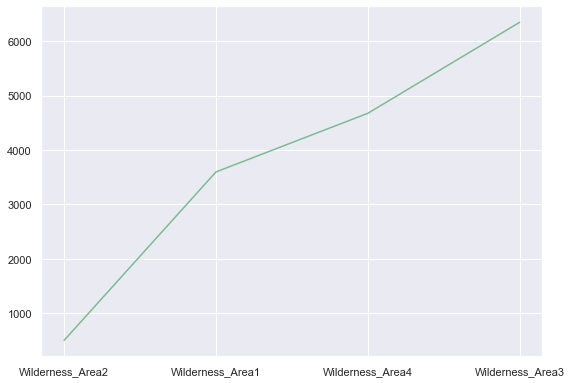

In [30]:
wild = train.iloc[:, 11:15].sum()
sns.set_theme(rc = {'figure.figsize':(8,6)}, palette='crest')
sns.lineplot(data=wild.sort_values());


In [49]:
wild.head(10)

Wilderness_Area1    3597
Wilderness_Area2     499
Wilderness_Area3    6349
Wilderness_Area4    4675
dtype: int64

In [37]:
wild.sort_values()

Wilderness_Area2     499
Wilderness_Area1    3597
Wilderness_Area4    4675
Wilderness_Area3    6349
dtype: int64

In [ ]:

# resersed get dummies
# new_df = df.idxmax(axis=1)


## data categories

In [5]:
cont_columns = [ 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
    
cat_columns = [ 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

target = 'Cover_Type'

 - distribution of the continuous colums

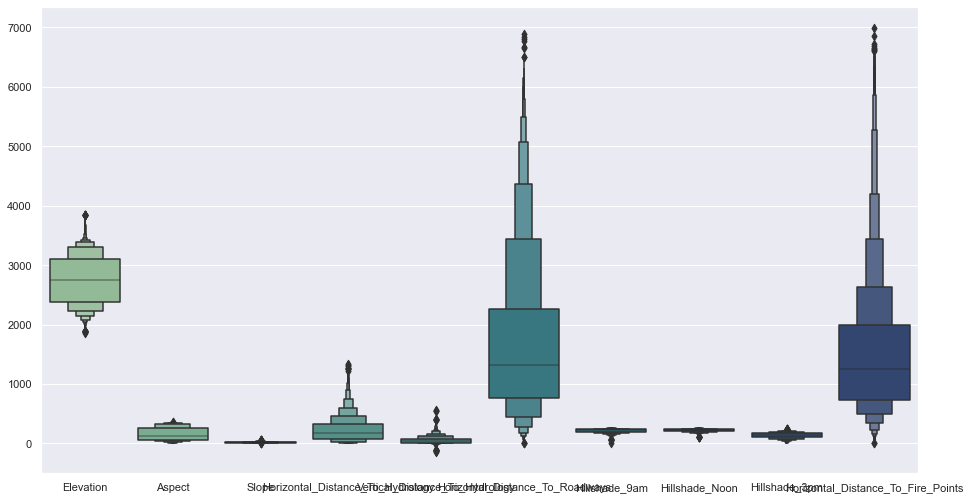

In [22]:
sns.set_theme(rc = {'figure.figsize':(14,8)}, palette='crest')
sns.boxenplot(data=train[cont_columns], palette='crest');

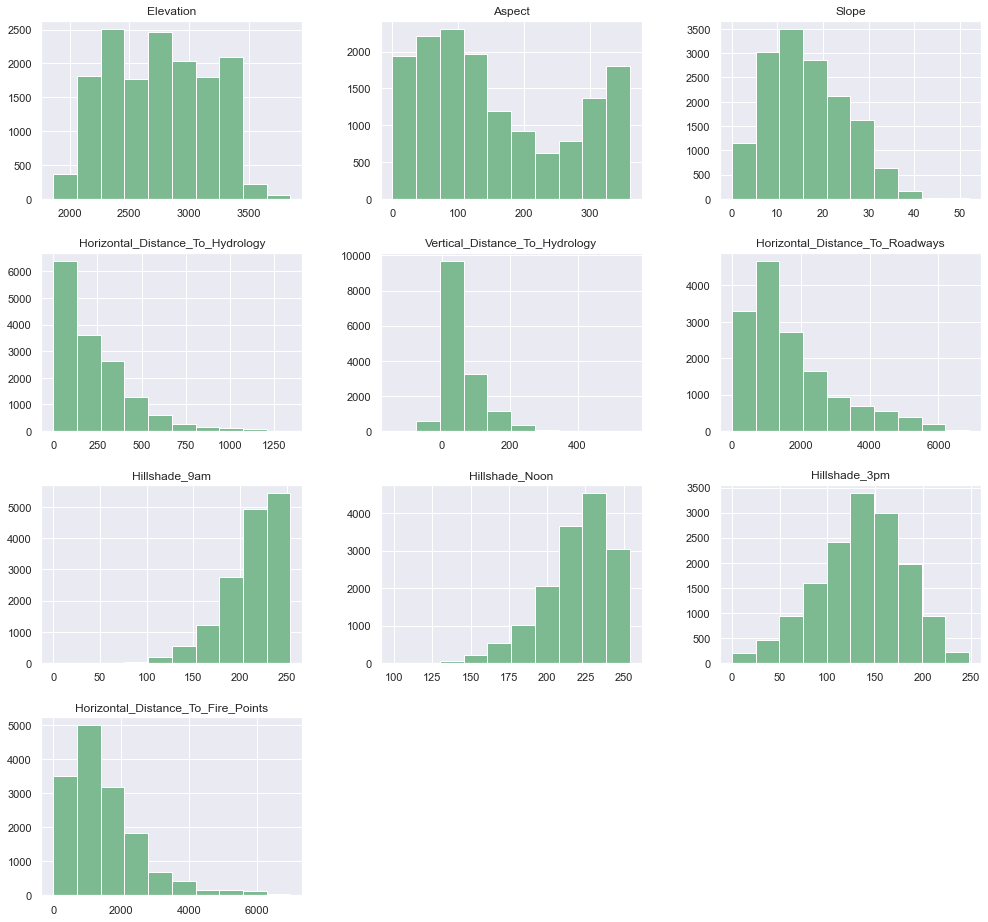

In [6]:

sns.set_theme(rc = {'figure.figsize':(14,8)}, palette='crest')
train[cont_columns].hist(figsize=(15,15));

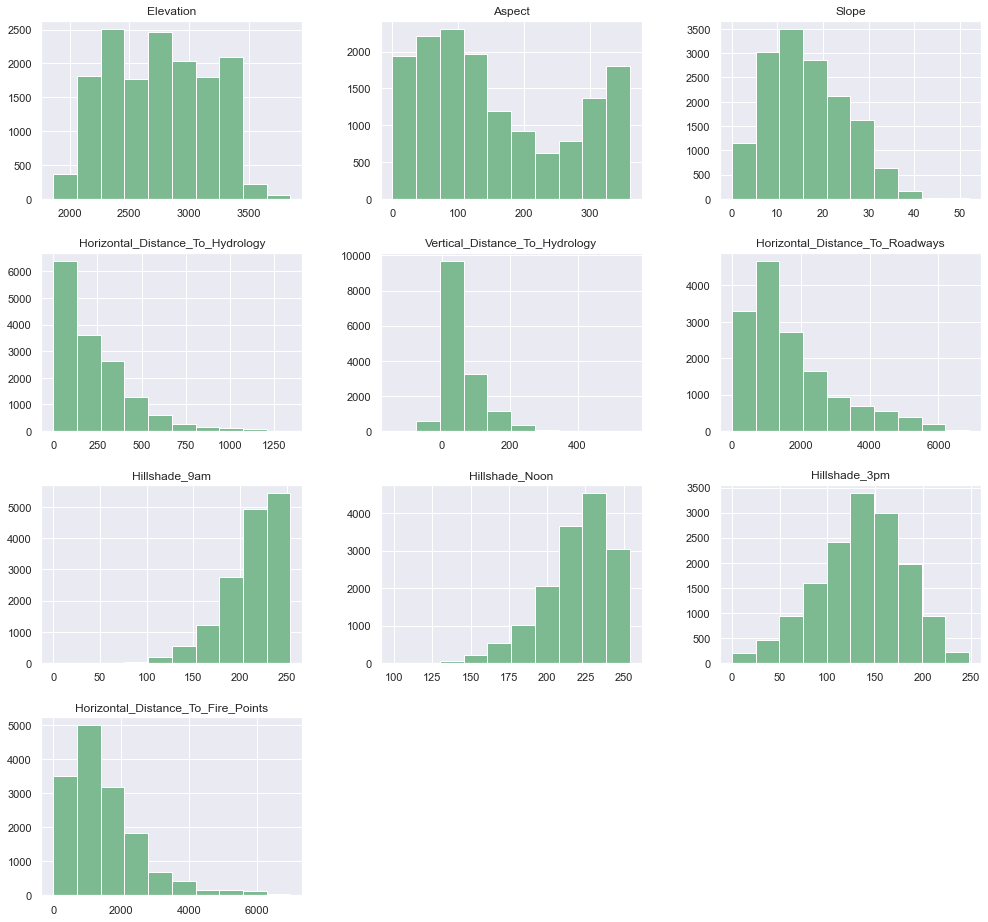

In [48]:
train[cont_columns].hist(figsize=(15,15));

only Hillshade_3pm is normally distributed.

- relation of continuous variables with the target:

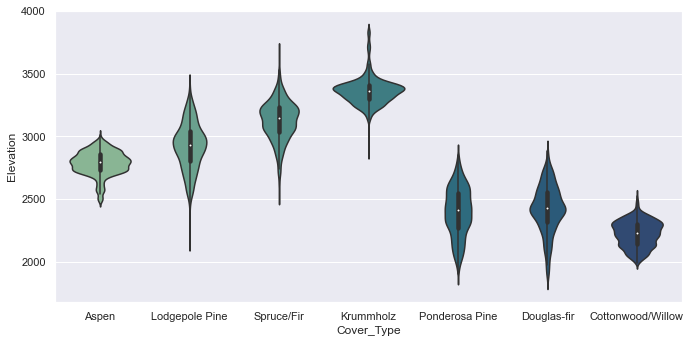

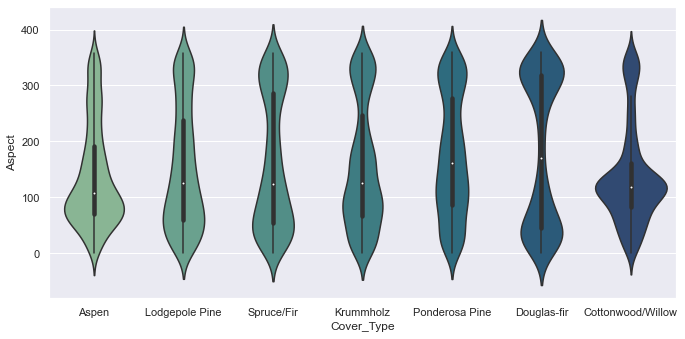

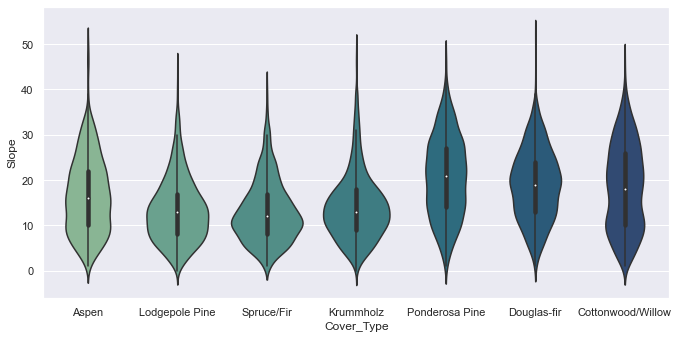

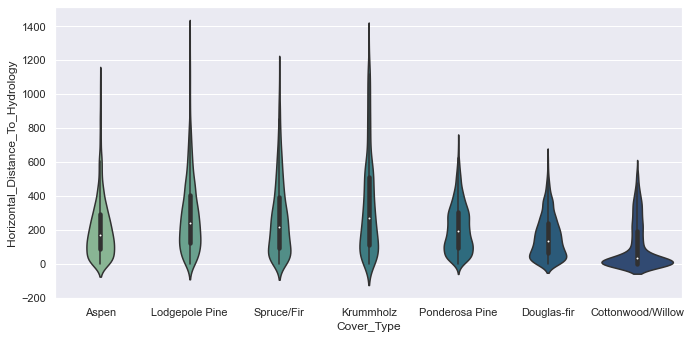

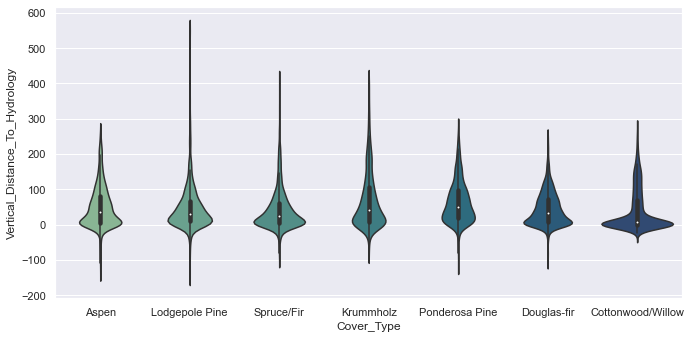

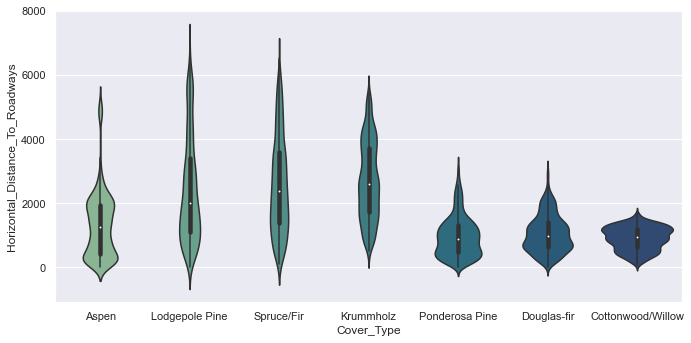

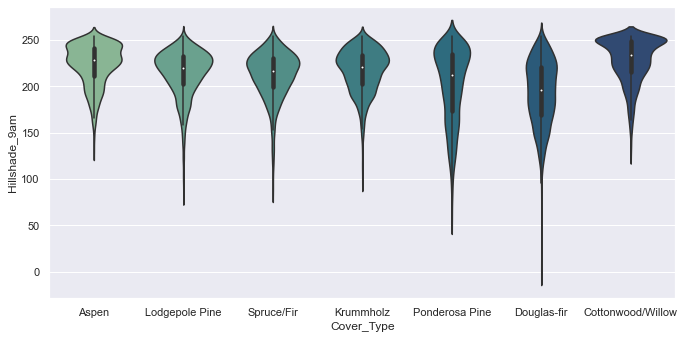

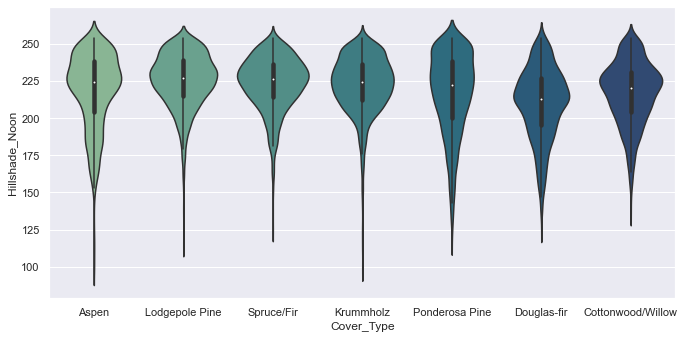

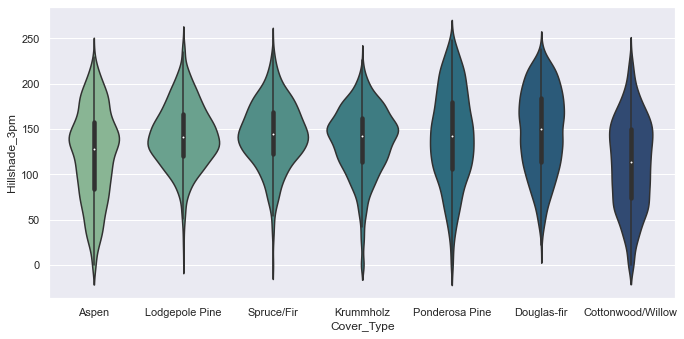

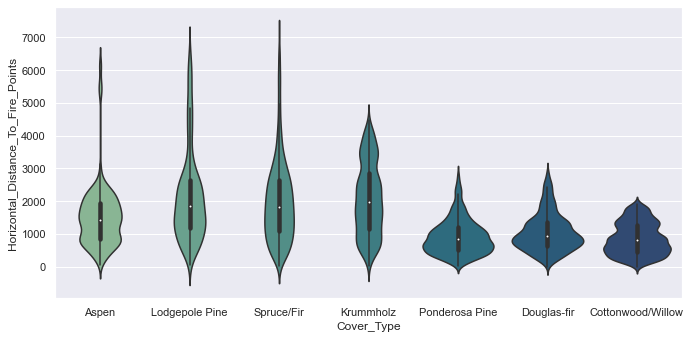

In [35]:
for index in range(len(cont_columns)):
  plt.figure(index, figsize=(10,5))
  sns.violinplot(y = train[cont_columns[index]], x = train[target], palette='crest')

## first conclusions:

- there's two types of quantitative/numerical data: continuous and discrete (binary)
- the dataset is free of nulls and duplicates
- the number of outliers is very small
- only 'Vertical_Distance_To_Hydrology' has negative values
- there's two colums (Soil_Type15 and Soil_Type7) only with 0s

In [ ]:
# collist = con_columns[:3]
# collist.append(out_label)
# sns.pairplot(train[ collist ], hue = "Cover_Type", diag_kind="hist")

In [ ]:
# collist = con_columns[3:6]
# collist.append(out_label)
# sns.pairplot(train[ collist ], hue = "Cover_Type", diag_kind="hist")

In [ ]:
# for index in range(len(cat_columns)):
#   plt.figure(index, figsize=(10,5))
#   #print(df_train.groupby(out_label)[cat_columns[index]].value_counts())
#   #print(df_train.groupby(out_label)[cat_columns[index]].sum())
#   #print(df_train.groupby(out_label)[cat_columns[index]].value_counts())
#   train.groupby(out_label)[cat_columns[index]].sum().plot.bar()
#   plt.title(cat_columns[index])
#   #sns.barplot(x= cat_columns[index], y=out_label, data=df_train)

In [ ]:
# for index in range(len(cat_columns)):
#   plt.figure(index, figsize=(10,5))
#   train.groupby(out_label)[cat_columns[index]].value_counts().plot.bar()
#   plt.title(cat_columns[index])

In [ ]:
# If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized. 
# This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

In [132]:
# REVISAR: no va bien con binarias

# from statsmodels.stats.outliers_influence import variance_inflation_factor


# X, y = train.drop("Cover_Type", axis=1), train["Cover_Type"]

# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                               feature         VIF
0                                   Id    1.395556
1                            Elevation   12.210669
2                               Aspect    1.958110
3                                Slope    9.372777
4     Horizontal_Distance_To_Hydrology    2.459628
5       Vertical_Distance_To_Hydrology    2.247968
6      Horizontal_Distance_To_Roadways    2.094913
7                        Hillshade_9am  121.233223
8                       Hillshade_Noon   46.393454
9                        Hillshade_3pm  183.408121
10  Horizontal_Distance_To_Fire_Points    1.739212
11                    Wilderness_Area1         inf
12                    Wilderness_Area2         inf
13                    Wilderness_Area3         inf
14                    Wilderness_Area4         inf
15                          Soil_Type1         inf
16                          Soil_Type2         inf
17                          Soil_Type3         inf
18                          Soi

In [54]:
# none works, NO RELATED with feat with corr
# # add new features from feature engineering
# train['Elev_to_Horizontal_Hyd'] = train.Elevation - 0.2 * train.Horizontal_Distance_To_Hydrology 
# train['Elev_to_Horizontal_Road'] = train.Elevation - 0.05 * train.Horizontal_Distance_To_Roadways  
# train['Elev_to_Verticle_Hyd'] = train.Elevation - train.Vertical_Distance_To_Hydrology 
# train['Mean_Horizontal_Dist'] = (train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology + 
#                                  train.Horizontal_Distance_To_Roadways)/3 
# train['Mean_Fire_Hydro'] = (train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology)/2